In [1]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.offline as py
from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
import pickle
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
path ="/content/drive/MyDrive/wlb12.csv"

In [12]:
df = pd.read_csv(path)

In [13]:
df.shape

(774, 24)

In [14]:
df.tail()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,RESULT,EXPERT_OPINION
769,4,5,5,3,1,8,1,2,1,7,...,9,5,2,4,5,5,1,1,1,Balanced
770,2,2,5,4,10,10,2,3,1,8,...,0,1,2,5,2,5,2,1,1,Balanced
771,0,5,2,7,6,6,2,2,2,8,...,5,5,2,10,1,1,1,1,1,Balanced
772,3,2,4,3,4,4,10,3,1,8,...,0,1,2,7,1,7,1,1,1,Balanced
773,2,3,1,5,3,4,3,2,2,2,...,2,2,2,3,3,3,1,1,1,Balanced


In [24]:
df.drop({'EXPERT_OPINION'}, axis=1, inplace=True) 
df.head(2)

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,RESULT
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,2,1,1
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,2,1,1


In [25]:
df.isnull().sum()

FRUITS_VEGGIES       0
DAILY_STRESS         0
PLACES_VISITED       0
CORE_CIRCLE          0
SUPPORTING_OTHERS    0
SOCIAL_NETWORK       0
ACHIEVEMENT          0
DONATION             0
BMI_RANGE            0
TODO_COMPLETED       0
FLOW                 0
DAILY_STEPS          0
LIVE_VISION          0
SLEEP_HOURS          0
LOST_VACATION        0
DAILY_SHOUTING       0
SUFFICIENT_INCOME    0
PERSONAL_AWARDS      0
TIME_FOR_PASSION     0
WEEKLY_MEDITATION    0
AGE                  0
GENDER               0
RESULT               0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   FRUITS_VEGGIES     774 non-null    int64
 1   DAILY_STRESS       774 non-null    int64
 2   PLACES_VISITED     774 non-null    int64
 3   CORE_CIRCLE        774 non-null    int64
 4   SUPPORTING_OTHERS  774 non-null    int64
 5   SOCIAL_NETWORK     774 non-null    int64
 6   ACHIEVEMENT        774 non-null    int64
 7   DONATION           774 non-null    int64
 8   BMI_RANGE          774 non-null    int64
 9   TODO_COMPLETED     774 non-null    int64
 10  FLOW               774 non-null    int64
 11  DAILY_STEPS        774 non-null    int64
 12  LIVE_VISION        774 non-null    int64
 13  SLEEP_HOURS        774 non-null    int64
 14  LOST_VACATION      774 non-null    int64
 15  DAILY_SHOUTING     774 non-null    int64
 16  SUFFICIENT_INCOME  774 non-null    int64
 17  PERSONAL_AWARDS 

In [27]:
df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

GENDER,0,1
AGE,,
0,NaN,3.000000
1,NaN,3.004149
2,NaN,3.102679
3,0.0,3.430108


In [28]:
colomn = df.columns
colomn

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'RESULT'],
      dtype='object')

In [29]:
lists=df.columns.to_list()
lists

['FRUITS_VEGGIES',
 'DAILY_STRESS',
 'PLACES_VISITED',
 'CORE_CIRCLE',
 'SUPPORTING_OTHERS',
 'SOCIAL_NETWORK',
 'ACHIEVEMENT',
 'DONATION',
 'BMI_RANGE',
 'TODO_COMPLETED',
 'FLOW',
 'DAILY_STEPS',
 'LIVE_VISION',
 'SLEEP_HOURS',
 'LOST_VACATION',
 'DAILY_SHOUTING',
 'SUFFICIENT_INCOME',
 'PERSONAL_AWARDS',
 'TIME_FOR_PASSION',
 'WEEKLY_MEDITATION',
 'AGE',
 'GENDER',
 'RESULT']

In [30]:
df[lists]

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,RESULT
0,3,2,2,5,0,5,2,0,1,6,...,7,5,5,1,4,0,5,2,1,1
1,2,3,4,3,8,10,5,2,2,5,...,8,2,2,2,3,2,6,2,1,1
2,2,3,3,4,4,10,3,2,2,2,...,8,10,2,2,4,8,3,2,1,1
3,3,3,10,3,10,7,2,5,2,3,...,5,7,5,1,5,2,0,3,1,1
4,5,1,3,3,10,4,2,4,2,5,...,7,0,0,2,8,1,5,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,4,5,5,3,1,8,1,2,1,7,...,8,9,5,2,4,5,5,1,1,1
770,2,2,5,4,10,10,2,3,1,8,...,8,0,1,2,5,2,5,2,1,1
771,0,5,2,7,6,6,2,2,2,8,...,8,5,5,2,10,1,1,1,1,1
772,3,2,4,3,4,4,10,3,1,8,...,8,0,1,2,7,1,7,1,1,1


In [31]:
lists2 = lists[0:22]
lists2

['FRUITS_VEGGIES',
 'DAILY_STRESS',
 'PLACES_VISITED',
 'CORE_CIRCLE',
 'SUPPORTING_OTHERS',
 'SOCIAL_NETWORK',
 'ACHIEVEMENT',
 'DONATION',
 'BMI_RANGE',
 'TODO_COMPLETED',
 'FLOW',
 'DAILY_STEPS',
 'LIVE_VISION',
 'SLEEP_HOURS',
 'LOST_VACATION',
 'DAILY_SHOUTING',
 'SUFFICIENT_INCOME',
 'PERSONAL_AWARDS',
 'TIME_FOR_PASSION',
 'WEEKLY_MEDITATION',
 'AGE',
 'GENDER']

<Axes: title={'center': 'Pearson Correlation of Features'}>

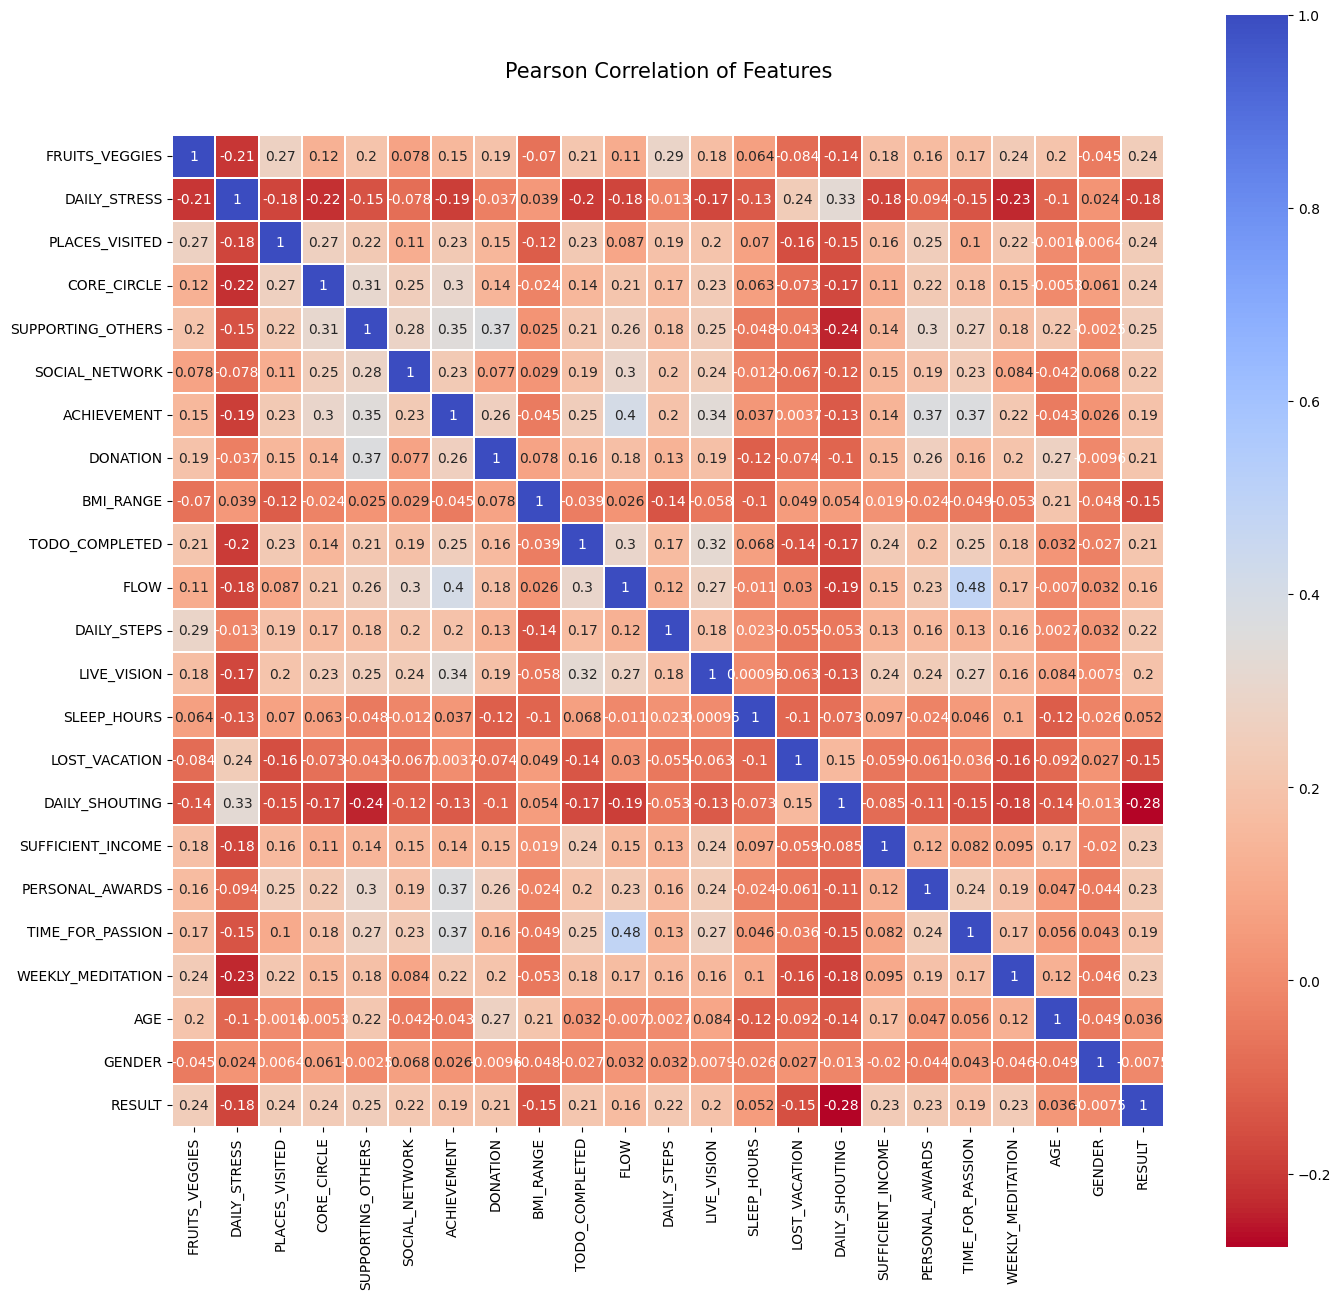

In [33]:
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap='coolwarm_r', linecolor='white', annot=True)

In [34]:
print(df[lists].dtypes)

FRUITS_VEGGIES       int64
DAILY_STRESS         int64
PLACES_VISITED       int64
CORE_CIRCLE          int64
SUPPORTING_OTHERS    int64
SOCIAL_NETWORK       int64
ACHIEVEMENT          int64
DONATION             int64
BMI_RANGE            int64
TODO_COMPLETED       int64
FLOW                 int64
DAILY_STEPS          int64
LIVE_VISION          int64
SLEEP_HOURS          int64
LOST_VACATION        int64
DAILY_SHOUTING       int64
SUFFICIENT_INCOME    int64
PERSONAL_AWARDS      int64
TIME_FOR_PASSION     int64
WEEKLY_MEDITATION    int64
AGE                  int64
GENDER               int64
RESULT               int64
dtype: object


#Data Visualization

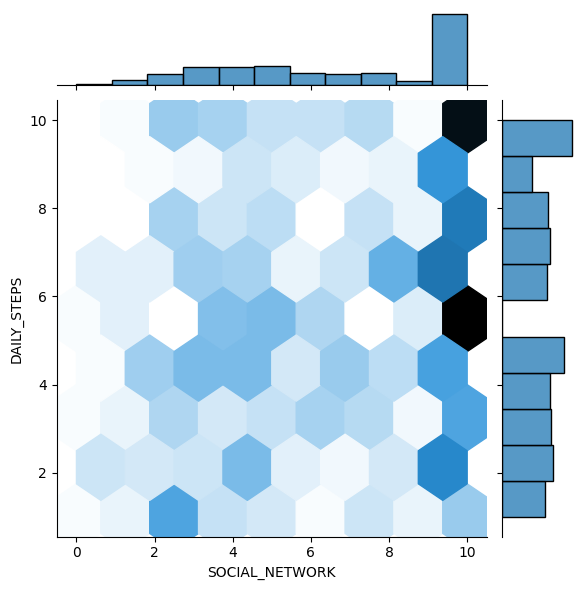

In [35]:
sns.jointplot(x='SOCIAL_NETWORK', y='DAILY_STEPS', data= df, kind ='hex')

<Axes: xlabel='AGE', ylabel='SOCIAL_NETWORK'>

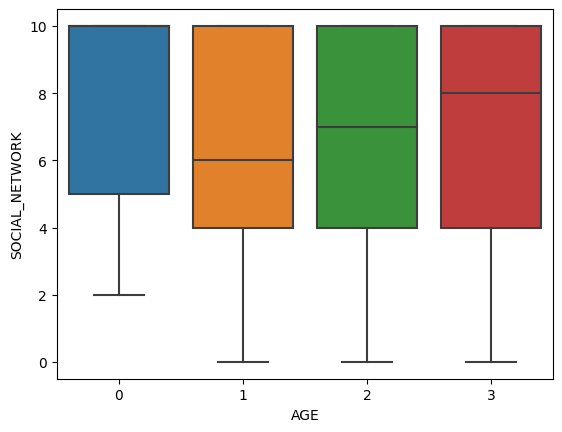

In [36]:
sns.boxplot(x='AGE',y='SOCIAL_NETWORK',data=df)

<Axes: xlabel='AGE', ylabel='TIME_FOR_PASSION'>

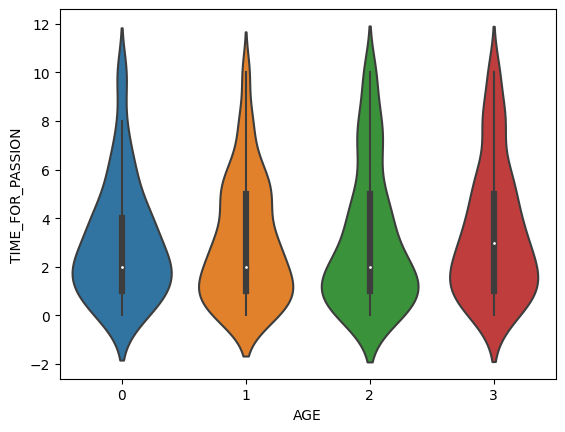

In [41]:
sns.violinplot(x='AGE',y='TIME_FOR_PASSION',data=df)

In [43]:
x = df.iloc[:,:-1]

In [44]:
y = df.iloc[:,22]

#Feature Importance

In [45]:
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
model = ExtraTreesClassifier()

In [47]:
model.fit(x,y)

ExtraTreesClassifier()

In [48]:
model.feature_importances_

array([0.05357938, 0.03053239, 0.04820149, 0.06369358, 0.06123042,
       0.06348426, 0.03935468, 0.05141825, 0.04255846, 0.03673044,
       0.04087129, 0.05530627, 0.03809848, 0.02980476, 0.04653513,
       0.08149801, 0.05993724, 0.04975497, 0.03135886, 0.05525951,
       0.02079213, 0.        ])

In [49]:
top = pd.Series(model.feature_importances_, index = x.columns)

In [50]:
top

FRUITS_VEGGIES       0.053579
DAILY_STRESS         0.030532
PLACES_VISITED       0.048201
CORE_CIRCLE          0.063694
SUPPORTING_OTHERS    0.061230
SOCIAL_NETWORK       0.063484
ACHIEVEMENT          0.039355
DONATION             0.051418
BMI_RANGE            0.042558
TODO_COMPLETED       0.036730
FLOW                 0.040871
DAILY_STEPS          0.055306
LIVE_VISION          0.038098
SLEEP_HOURS          0.029805
LOST_VACATION        0.046535
DAILY_SHOUTING       0.081498
SUFFICIENT_INCOME    0.059937
PERSONAL_AWARDS      0.049755
TIME_FOR_PASSION     0.031359
WEEKLY_MEDITATION    0.055260
AGE                  0.020792
GENDER               0.000000
dtype: float64

<Axes: >

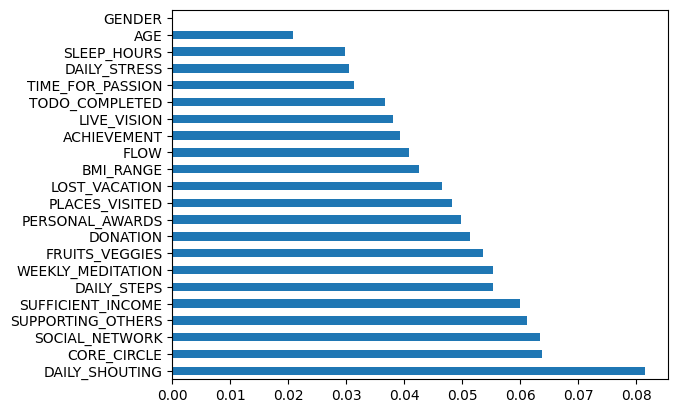

In [51]:
top.nlargest(22).plot(kind='barh')

#Train and Test split

In [52]:
X =df[lists2]
y =df['RESULT']




# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print(X_train,y_train)

     FRUITS_VEGGIES  DAILY_STRESS  PLACES_VISITED  CORE_CIRCLE  \
140               4             4              10            5   
345               4             3               2            5   
549               4             3               0            7   
127               5             1               6           10   
230               5             1               3            5   
..              ...           ...             ...          ...   
763               4             4               7            6   
192               3             4               2            4   
629               3             3              10            6   
559               5             3              10            1   
684               2             1               5            4   

     SUPPORTING_OTHERS  SOCIAL_NETWORK  ACHIEVEMENT  DONATION  BMI_RANGE  \
140                  7               7            7         3          1   
345                  5               5            2    

#Confustion Matrix Function

In [53]:
def make_confusion_matrix(matrix):
    cf_matrix = matrix
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#Create Classifier Object

##K Nearest Neighbours

In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_met = precision_recall_fscore_support(y_test,knn_pred, average='macro')

print("Accuracy of KNN Classifier on test set: {:.2f}"
      .format(knn.score(X_test, y_test)))

knn_acc = knn.score(X_test, y_test)

print(knn_met)
 

Accuracy of KNN Classifier on test set: 0.98
(0.8517952635599695, 0.8517952635599695, 0.8517952635599695, None)


0.8517952635599695
0.8517952635599695


Text(0.5, 1.0, 'Confusion Matrix - K-nearest Neighbour')

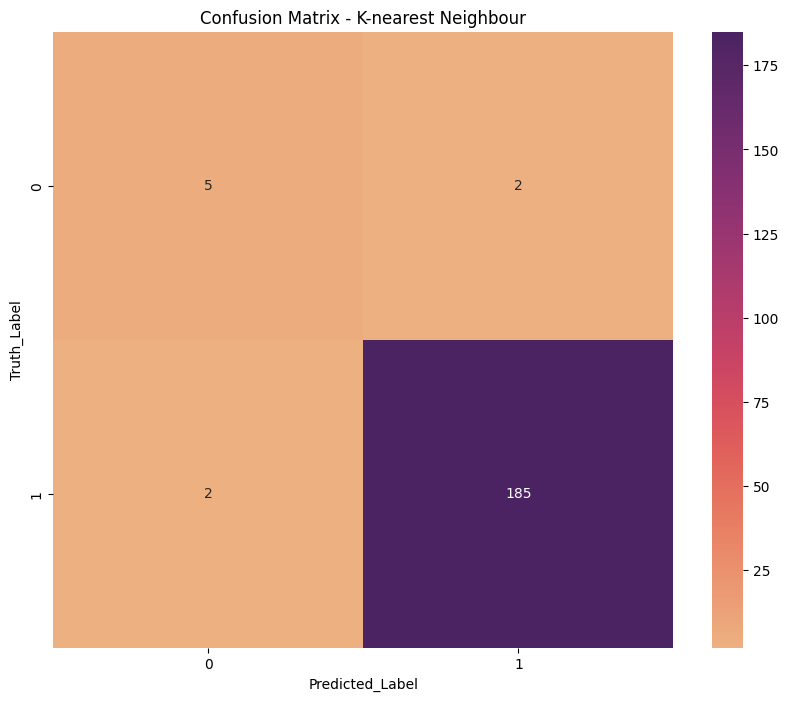

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
cm


def sensitivity(y_test, pred):
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        sense = np.mean(Sensitivity)
        return sense

print(sensitivity(y_test, knn_pred))        

def specificity(y_test, pred):
        
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

print(specificity(y_test, knn_pred))
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - K-nearest Neighbour')

#KNN K-Fold cross validation

In [56]:
from sklearn.model_selection import cross_val_score
knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(knn_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(knn_accuracies.std()*100))

Accuracy: 98.28 %
Standard Deviation: 1.34 %


##Decision Trees

Accuracy of Decision Tree classifier on test set: 0.96
(0.7445652173913043, 0.8437738731856379, 0.7846836847946725, None)
[1]
0.8437738731856379
0.8437738731856379


Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

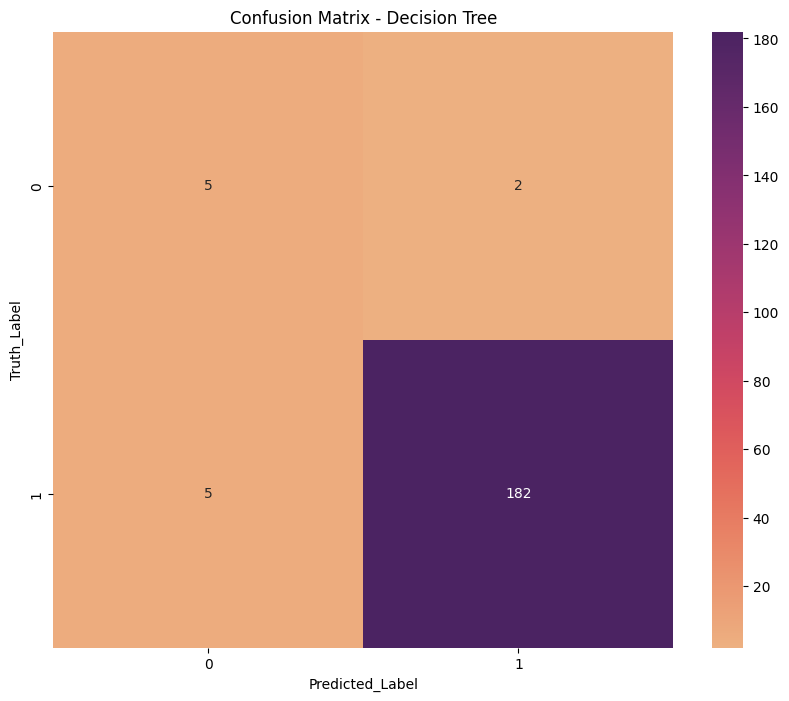

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_met = precision_recall_fscore_support(y_test,dt_pred, average='macro')

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

dt_acc = dt.score(X_test, y_test)

print(dt_met)

X_new=[[5,1,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,3,1]]



y_new=dt.predict(X_new)
print(y_new)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dt_pred)
cm

def sensitivity(y_test, pred):
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        sense = np.mean(Sensitivity)
        return sense

print(sensitivity(y_test, dt_pred))  
def specificity(y_test, pred):
        
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

print(specificity(y_test, dt_pred))


# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Decision Tree')

#Dt k-Fold cross validation

In [58]:
from sklearn.model_selection import cross_val_score
dt_accuracies = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(dt_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(dt_accuracies.std()*100))

Accuracy: 95.00 %
Standard Deviation: 2.72 %


##Support Vector Machine

Accuracy of Kernalized Support Vector Machine Classifier on test set: 0.98
(0.9921052631578947, 0.7857142857142857, 0.8596575837955148, None)
0.7857142857142857
0.7857142857142857


Text(0.5, 1.0, 'Confusion Matrix - Support Vector machine')

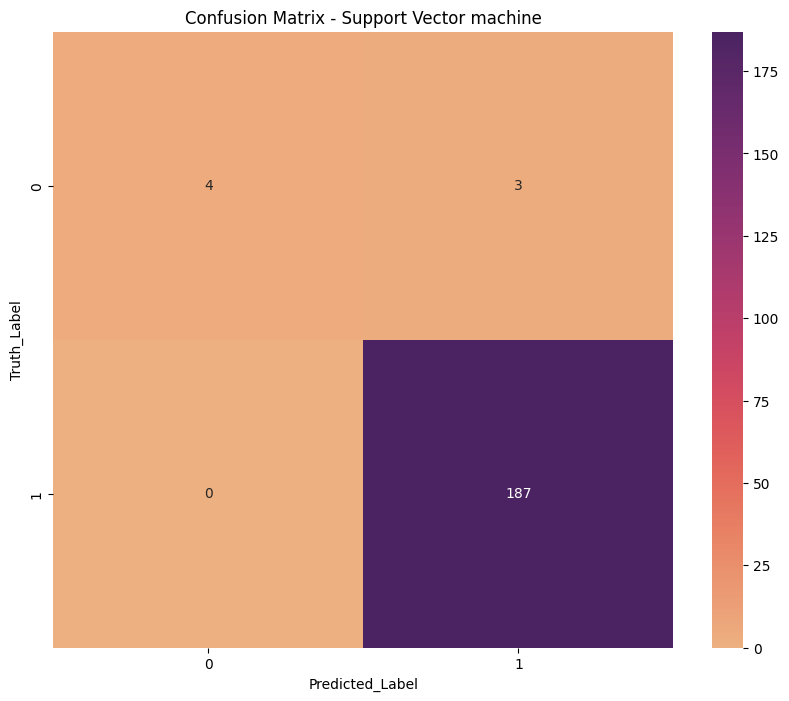

In [59]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# The default SVC kernel is radial basis function (RBF)
svm= SVC().fit(X_train, y_train)

svm_pred = svm.predict(X_test)

svm_met = precision_recall_fscore_support(y_test,svm_pred, average='macro')

print('Accuracy of Kernalized Support Vector Machine Classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

svm_acc = svm.score(X_test, y_test)

print(svm_met)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
cm

def sensitivity(y_test, pred):
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        sense = np.mean(Sensitivity)
        return sense

print(sensitivity(y_test, svm_pred))        

def specificity(y_test, pred):
        
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

print(specificity(y_test, svm_pred))
# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Support Vector machine')



#SVM k-Fold cross validation

In [60]:
from sklearn.model_selection import cross_val_score
svm_accuracies = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(svm_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(svm_accuracies.std()*100))

Accuracy: 96.90 %
Standard Deviation: 1.29 %


##Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

linreg_pred = linreg.predict(X_test)

linreg_pred = [ int(x) for x in linreg_pred]

linreg_met = precision_recall_fscore_support(y_test,linreg_pred, average='macro')

print('Accuracy of Linear Regression on test set: {:.2f}'
     .format(linreg.score(X_test, y_test)))

linreg_acc = linreg.score(X_test, y_test)

print(linreg_met)
"""
linreg_matrix = confusion_matrix(y_test,linreg_pred)

linreg_fn = linreg_matrix[1][0]

make_confusion_matrix(linreg_matrix)"""

Accuracy of Linear Regression on test set: 0.16
(0.5259259259259259, 0.6577540106951871, 0.2891331730218711, None)


'\nlinreg_matrix = confusion_matrix(y_test,linreg_pred)\n\nlinreg_fn = linreg_matrix[1][0]\n\nmake_confusion_matrix(linreg_matrix)'

#Linear K-Fold cross validation

In [62]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = linreg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 13.07 %
Standard Deviation: 21.71 %


##Random Forest

Accuracy of Random Forest on test set: 0.98
(0.9921052631578947, 0.7857142857142857, 0.8596575837955148, None)
[1]
0.7857142857142857
0.7857142857142857


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

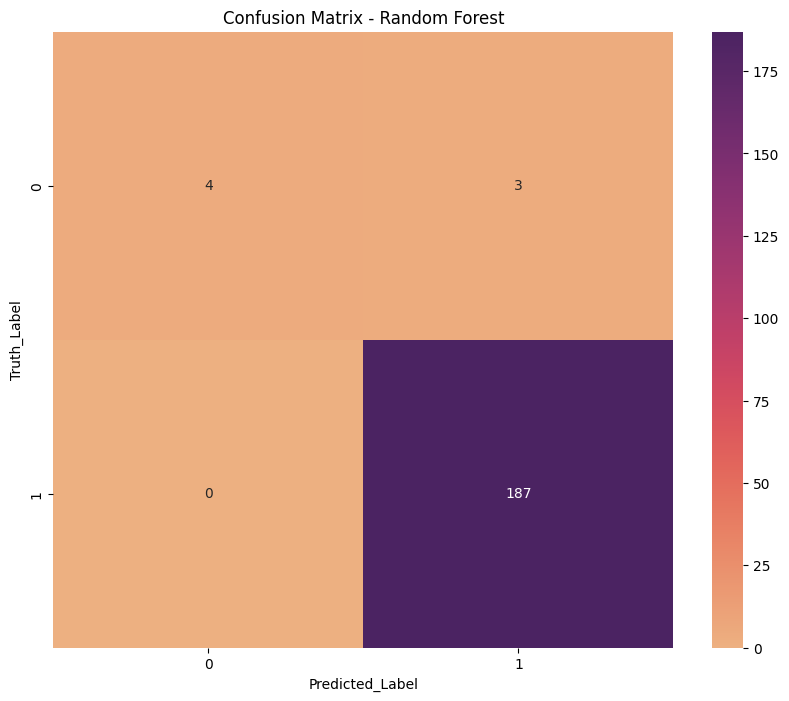

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=8, random_state=0)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_met = precision_recall_fscore_support(y_test,rf_pred, average='macro')

print('Accuracy of Random Forest on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

rf_acc = rf.score(X_test, y_test)

print(rf_met)

X_new=[[2,3,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,2,1]]



y_new=rf.predict(X_new)
print(y_new)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
cm
def sensitivity(y_test, pred):
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        sense = np.mean(Sensitivity)
        return sense

print(sensitivity(y_test, rf_pred))        

def specificity(y_test, pred):
        
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

print(specificity(y_test, rf_pred))


# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Random Forest')


#Random Forest K-fold cross validation

In [66]:
from sklearn.model_selection import cross_val_score
rf_accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(rf_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(rf_accuracies.std()*100))

Accuracy: 97.07 %
Standard Deviation: 1.10 %


##AdaBoost

Accuracy of AdaBoost Classifier on test set: 0.97
(0.825354609929078, 0.780366692131398, 0.801025641025641, None)
0.780366692131398
0.780366692131398


Text(0.5, 1.0, 'Confusion Matrix - Adaboost')

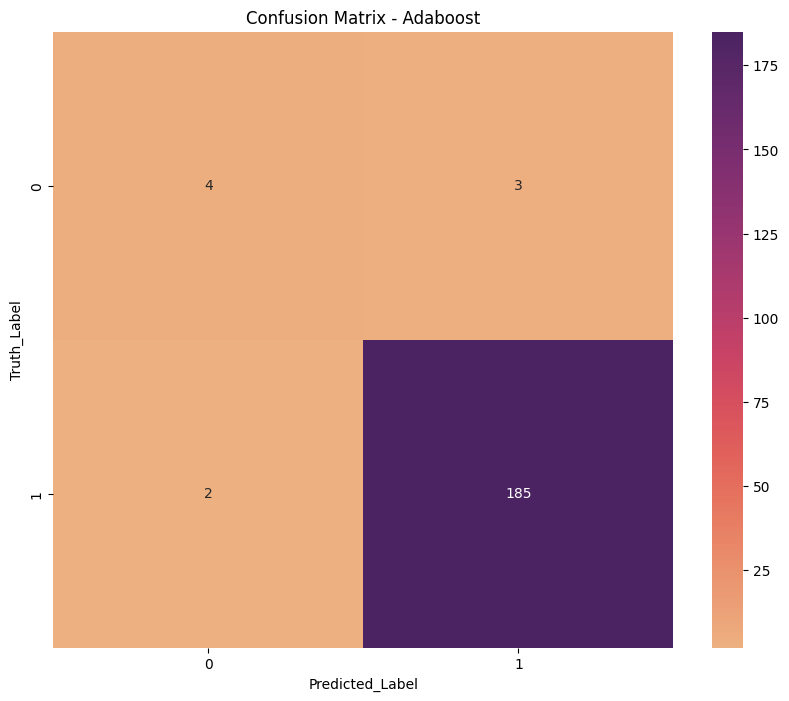

In [68]:
from sklearn.ensemble import AdaBoostClassifier

aBoost = AdaBoostClassifier(n_estimators=100)

aBoost.fit(X_train, y_train)

aBoost_pred = aBoost.predict(X_test)

aBoost_met = precision_recall_fscore_support(y_test,aBoost_pred, average='macro')

print('Accuracy of AdaBoost Classifier on test set: {:.2f}'
     .format(aBoost.score(X_test, y_test)))

aBoost_acc = aBoost.score(X_test, y_test)

print(aBoost_met)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, aBoost_pred)
cm
def sensitivity(y_test, pred):
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        sense = np.mean(Sensitivity)
        return sense

print(sensitivity(y_test, aBoost_pred))        

def specificity(y_test, pred):
        
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

print(specificity(y_test, aBoost_pred))

# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Adaboost')

#AdaBoost K-Fold cross validation

In [69]:
from sklearn.model_selection import cross_val_score
ab_accuracies = cross_val_score(estimator = aBoost, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(ab_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(ab_accuracies.std()*100))

Accuracy: 97.93 %
Standard Deviation: 1.69 %


##Gradient Tree Boosting

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score



gtb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.25, max_depth=7, random_state=0).fit(X_train, y_train)

gtb_pred = gtb.predict(X_test)
gtb_prob_pred_cnb = gtb.predict_proba(X_test)

gtb_met = precision_recall_fscore_support(y_test,gtb_pred, average='macro')

print('Accuracy of Gradient Tree Boosting Classifier on test set: {:.2f}'
     .format(gtb.score(X_test, y_test)))

gtb_acc = gtb.score(X_test, y_test)

print(gtb_met)



Accuracy of Gradient Tree Boosting Classifier on test set: 0.96
(0.7445652173913043, 0.8437738731856379, 0.7846836847946725, None)


0.8437738731856379
0.8437738731856379


Text(0.5, 1.0, 'Confusion Matrix - Gradient Tree Boosting')

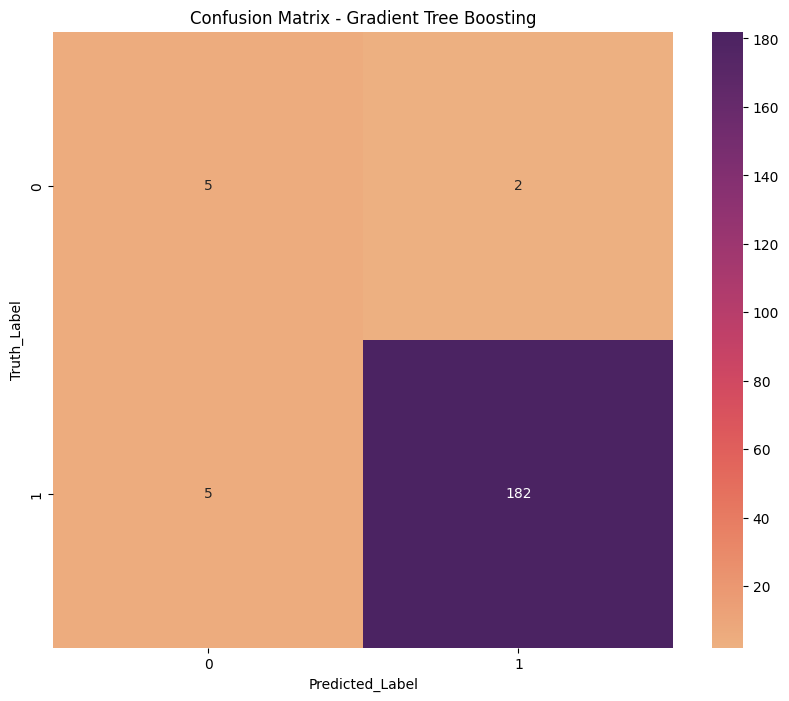

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, gtb_pred)
cm
def sensitivity(y_test, pred):
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        sense = np.mean(Sensitivity)
        return sense

print(sensitivity(y_test, gtb_pred))        

def specificity(y_test, pred):
        
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

print(specificity(y_test, gtb_pred))

# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Gradient Tree Boosting')


#Gradient Tree k-Fold cross validation

In [72]:
from sklearn.model_selection import cross_val_score
gtb_accuracies = cross_val_score(estimator = gtb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(gtb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(gtb_accuracies.std()*100))

Accuracy: 96.21 %
Standard Deviation: 2.29 %


##Naive Bayes

Accuracy of Naive Bayes Classifier on test set: 0.87
(0.5969512195121951, 0.8644003055767762, 0.6265496265496265, None)
nan
0.8644003055767762
0.8644003055767762


Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

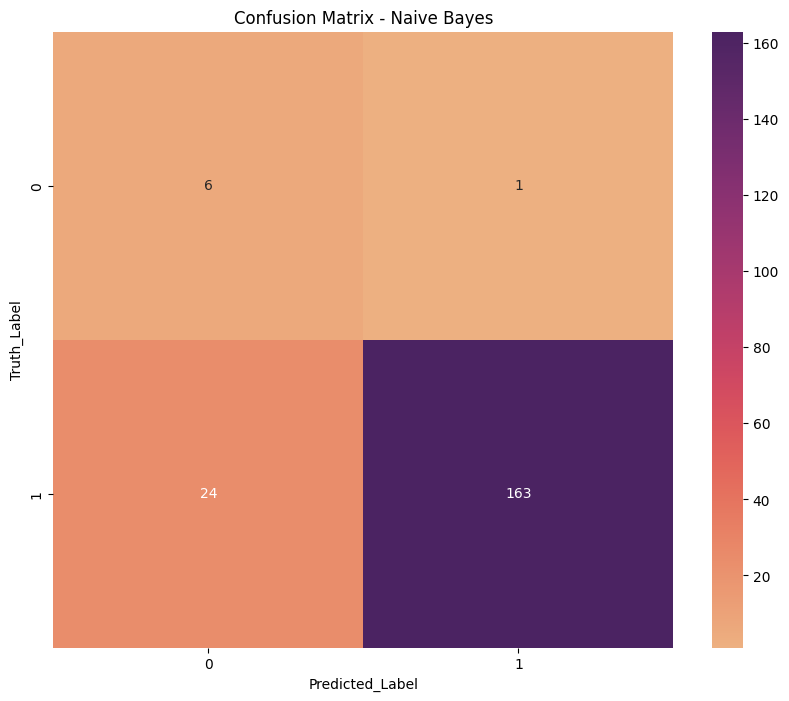

In [73]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

nb_met = precision_recall_fscore_support(y_test,nb_pred, average='macro')

print('Accuracy of Naive Bayes Classifier on test set: {:.2f}'
     .format(nb.score(X_test, y_test)))

nb_acc = nb.score(X_test, y_test)

print(nb_met)

def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

print(mape(y_test,nb_pred ))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_pred)
cm
def sensitivity(y_test, pred):
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Sensitivity = TP/(TP+FN)    
        sense = np.mean(Sensitivity)
        return sense

print(sensitivity(y_test, nb_pred))        

def specificity(y_test, pred):
        
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

print(specificity(y_test, nb_pred))

# after creating the confusion matrix, for better understaning plot the cm.
import seaborn as sn
plt.figure(figsize = (10,8))
# were 'cmap' is used to set the accent colour
sn.heatmap(cm, annot=True, cmap= 'flare',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Naive Bayes')

#Naive Bayes k-Fold cross validation

In [74]:
from sklearn.model_selection import cross_val_score
nb_accuracies = cross_val_score(estimator = nb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(nb_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(nb_accuracies.std()*100))

Accuracy: 92.24 %
Standard Deviation: 3.01 %


#Plot ROC and compare AUC

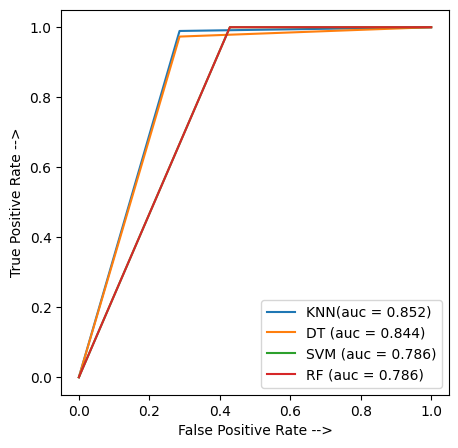

In [75]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, knn_pred)
auc_knn = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt_pred)
auc_dt = auc(dt_fpr, dt_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, svm_pred)
auc_svm = auc(svm_fpr, svm_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, rf_pred)
auc_rf = auc(rf_fpr, rf_tpr)


plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN(auc = %0.3f)' % auc_knn)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_dt)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_rf)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [77]:
filename = 'model.pkl'
pickle.dump(knn, open(filename, 'wb'))